In [1]:
import Pkg

In [5]:
Pkg.activate("D:\\Users\\gabri\\Documents\\Data Science & Machine Learning Spring 2025\\Lundquist-CMOR438-Spring2025\\juMLia")

  Activating project at `D:\Users\gabri\Documents\Data Science & Machine Learning Spring 2025\Lundquist-CMOR438-Spring2025\juMLia`


In [6]:
import MLDatasets: MNIST
using DataFrames, Plots, ColorSchemes

In [ ]:
trainMNIST = MNIST(:train)
testMNIST = MNIST(:test)
traininputs, traintargets = trainMNIST[:]
testinputs, testtargets = testMNIST[:]
# Nicely, the inputs are already scaled to 1.

(features = Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

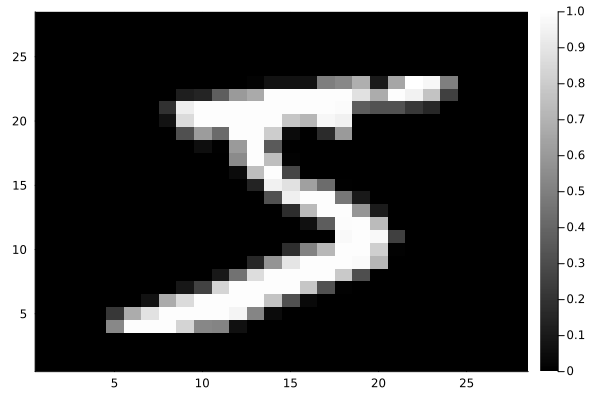

In [8]:
heatmap(reverse(transpose(traininputs[:,:,1]), dims=1), cmap=:bone)

In [ ]:
@time reduce(vcat, traininputs[:,:,1])
@time reshape(traininputs[:,:,3], (length(traininputs[:,:,3]),1))
# reshape is much faster and more memory efficient than that reduce call!
@time vec(traininputs[:,:,3])
# vec is slightly better...

  0.000176 seconds (1.85 k allocations: 1.260 MiB)
  0.000022 seconds (13 allocations: 6.498 KiB)
  0.000020 seconds (6 allocations: 3.257 KiB)


784-element Vector{Float32}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [38]:
# Preallocation
traininputsflat = zeros(size(traininputs,1)*size(traininputs,2), size(traininputs,3))
traintargetsencoded = BitArray(undef, 10, size(traintargets)[end])

10×60000 BitMatrix:
 0  0  1  0  0  0  0  1  0  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  1  0  0  0  1  1  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  1  0  1  1  0  1  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  1  0  1  0  1  1  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  1  1  0  1  0  0  0  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  1  0  0  0  1  0  1  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  1  0  1  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  1  1  0  0  1  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0

In [ ]:
function assignbitarrayfunc1!(targets, prealloctargetsencoded)
    for (targetindex, targetnum) in enumerate(targets)
        prealloctargetsencoded[:,targetindex] .= BitArray([zeros(targetnum); 1; zeros(9 - targetnum)])
    end
    return prealloctargetsencoded
end

function assignbitarrayfunc3!(targets, prealloctargetsencoded)
    for (targetindex, targetnum) in enumerate(targets)
        prealloctargetsencoded[:,targetindex] = BitArray(zeros(10))
    end
    return prealloctargetsencoded
end

function assignbitarrayfunc3!(targets, prealloctargetsencoded)
    for (targetindex, targetnum) in enumerate(targets)
        prealloctargetsencoded[:,targetindex] = BitArray(zeros(10))
        prealloctargetsencoded[targetnum+1, targetindex] = 1
    end
end

function assignbitarrayfunc4!(targets, prealloctargetsencoded)
    for (targetindex, targetnum) in enumerate(targets)
        prealloctargetsencoded[:,targetindex] = zeros(10)
        prealloctargetsencoded[targetnum+1, targetindex] = 1
    end
end

function assignbitarrayfunc5!(targets, prealloctargetsencoded)
    for (targetindex, targetnum) in enumerate(targets)
        prealloctargetsencoded[:,targetindex] .= BitArray(zeros(10))
        prealloctargetsencoded[targetnum+1, targetindex] = 1
    end
end

function assignbitarrayfunc6!(targets, prealloctargetsencoded)
    for (targetindex, targetnum) in enumerate(targets)
        prealloctargetsencoded[:,targetindex] .= zeros(10)
        prealloctargetsencoded[targetnum+1, targetindex] = 1
    end
end

function assignbitarrayfunc7!(targets, prealloctargetsencoded)
    for (targetindex, targetnum) in enumerate(targets)
        prealloctargetsencoded[:,targetindex] .= 0
        prealloctargetsencoded[targetnum+1, targetindex] = 1
    end
end

# 7 is easily the fastest, because it doesn't construct any new arrays.

In [ ]:
"Flattens every dimension except the final one"
function flattenmultiarray(array::Array{<:Any, 3})
    arrayflat = Array{eltype(array), 2}(undef, prod(size(array)[1:2]), size(array)[end]) # Preallocate array
    for i in 1:(size(array)[end])
        arrayflat[:,i] = vec(traininputs[:,:,i])
    end
    return arrayflat
end

"One-hot encodes a vector of digits 0-9."
function onehotencode(digitlist::Vector{<:Int})
    digitsencoded = BitArray(undef, 10, length(digitlist))
    for (index, digit) in enumerate(digitlist)
        digitsencoded[:,index] .= 0
        digitsencoded[digit+1, index] = 1
    end
    return digitsencoded
end


In [43]:
temp = 3
one(temp)

1

In [ ]:
sigmoid(value) = 1.0 ./ (1.0 .+ exp.(-value))

sigmoid_firstderiv(value) = sigmoid(value) .* (1.0 .- sigmoid(value))

"""Mean squared error between `predictions` and `targets`. Used as a 
loss function."""
meansquarederror(predictions, targets) = 0.5 .* (predictions .- targets).^2

meansquarederror

In [45]:
isconcretetype(Vector{Vector{Float64}})

true

In [48]:
isabstracttype(Function)

true

In [49]:
isabstracttype(Vector{Function})

false

In [ ]:
mutable struct SingleNeuron{ActivatorF, GradientF, LossF}
    const activationfunction::ActivatorF
    const gradient::GradientF
    const loss::LossF
    weights::Vector{Float64}
    bias::Float64
    previousweights::Vector{Float64}
    previousbias::Float64
    losshistory::Array{Float64,1}
    prevlosshistory::Array{Float64,1}
end 


In [50]:
mutable struct NeuralLayer{ActivatorF, GradientF}
    const activationfunction::ActivatorF
    const gradient::GradientF
    weights::Matrix{Float64}
    bias::Vector{Float64}
end

In [52]:
isabstracttype(Vector{NeuralLayer})

false

In [ ]:
# Struct of arrays
mutable struct NeuralNetworkSoA{LossF}
    const activationfunctions::Vector{Function}
    const gradients::Vector{Function}
    const loss::LossF
    weights::Vector{Matrix{Float64}}
    bias::Vector{Vector{Float64}}
    previousweights::Vector{Matrix{Float64}}
    previousbias::Vector{Vector{Float64}}
    losshistory::Vector{Float64}
    prevlosshistory::Vector{Float64}
end 

# Array of structs
mutable struct NeuralNetworkAoS{LossF}
    const loss::LossF
    layers::Vector{NeuralLayer}
    previousweights::Vector{Matrix{Float64}}
    previousbias::Vector{Vector{Float64}}
    losshistory::Vector{Float64}
    prevlosshistory::Vector{Float64}
end


In [ ]:
function NeuralNetworkSoA(activationfunctions::Vector{Function},
                          gradientfunctions::Vector{Function},
                          lossfunction, 
                          weights::Vector{Matrix{Float64}}, 
                          bias::Vector{Vector{Float64}})
    if length(activationfunctions) != length(gradientfunctions)
        error("Function lists must be of the same length. \
                Given lengths are $(length(activationfunctions)) \
                and $(length(gradientfunctions)).")
    
    if length(weights) != length(bias)
        error("Weights and bias vectors must be of compatible length. \
                Given lengths are $(length(weights)) \
                and $(length(bias)).")

    if length(weights) != length(activationfunctions)
        error("Number of weight matrices and number of functions \
                be the same. Given are $(length(weights)) \
                weights and $(length(activationfunctions)) \
                functions.")

    return NeuralNetworkSoA{typeof(lossfunction)}(activationfunctions, 
                                                  gradientfunctions, 
                                                  lossfunction, 
                                                  weights, bias, weights, bias,
                                                  [], [])
end

function NeuralNetworkSoA(activationfunctions::Vector{Function},
                          gradientfunctions::Vector{Function},
                          lossfunction, 
                          numnodesperlayer)

    numlayers = length(activationfunctions) + 1

    if (length(numnodesperlayer) != numlayers
            && length(numnodesperlayer) > 1)
        error("Must be either a constant node count or as many 
                node counts as there are layers. \
                Given layer count is $(numlayers) \
                and the node counts specified are of length $(length(numnodesperlayer)).")
    end

    weights = []
    bias = []
    if length(numnodesperlayer) == 1
        weights = [zeros(numnodesperlayer, numnodesperlayer) for _ in 1:(numlayers-1)]
        bias = [zeros(numnodesperlayer) for _ in 1:(numlayers-1)]
    else
        # The nodes at the first layer have no weights before them.
        weights = [zeros(numnodesperlayer[layer+1], numnodesperlayer[layer])
                   for layer in 1:(numlayers-1)]
        bias = [zeros(numnodesperlayer[layer+1]) for layer in 1:(numlayers-1)]
    end

    return NeuralNetworkSoA(activationfunctions, gradientfunctions, 
                            lossfunction, 
                            weights, bias, weights, bias,
                            [], [])
end

function NeuralNetworkSoA(activationfunction::Function, 
                          gradientfunction::Function, 
                          lossfunction::Function, 
                          weights::Vector{Matrix{Float64}}, 
                          bias::Vector{Vector{Float64}})

    numweightmatrices = length(weights)
    return NeuralNetworkSoA(repeat([activationfunction], numweightmatrices), 
                            repeat([gradientfunction], numweightmatrices), 
                            lossfunction, weights, bias)
end

function NeuralNetworkSoA(activationfunction::Function, 
                          gradientfunction::Function, 
                          lossfunction::Function, 
                          numlayers::Int, numnodesperlayer::Vector{<:Int})

    numlayers = length(numnodesperlayer)
    return NeuralNetworkSoA(repeat([activationfunction], numlayers - 1), 
                            repeat([gradientfunction], numlayers - 1), 
                            lossfunction, weights, bias)
end

function NeuralNetworkSoA(inputlength::Int, outputlength::Int; 
                          numhiddenlayers::Int=2, 
                          hiddenlayerlengths::Int=round(√(inputlength * outputlength)))
    